**LAB-09:Classification using Kernal Machines (SVM)**

---



* Created Date: 10.04.2024
* Created By: Blessy Louis(2348416)
* edited on: 10.04.2024

#Importing the necessary packages and libaries


1. **sklearn.metrics.confusion_matrix**: This library provides functionality to compute confusion matrix to evaluate the accuracy of a classification.

2. **sklearn.model_selection.train_test_split**: This library is used to split the dataset into training and testing sets. It's commonly used to assess the performance of a machine learning model.

3. **sklearn.svm**: This is the Support Vector Machines (SVM) implementation in scikit-learn, a popular machine learning library in Python. It provides implementations of SVM algorithms for classification and regression tasks.

4. **sklearn.metrics.f1_score**: This library provides functionality to compute the F1 score, which is the harmonic mean of precision and recall. It's commonly used as a performance metric for classification problems.

5. **matplotlib.pyplot**: Matplotlib is a plotting library for Python. `pyplot` is a subpackage of Matplotlib that provides a MATLAB-like interface for creating plots and visualizations.

6. **numpy**: NumPy is a fundamental package for scientific computing in Python. It provides support for multi-dimensional arrays and matrices, along with a large collection of mathematical functions.

7. **pandas**: Pandas is a powerful library for data manipulation and analysis in Python. It provides data structures and functions to work with structured data efficiently, primarily in the form of DataFrame objects.

8. **seaborn**: Seaborn is a statistical data visualization library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In summary, these libraries are essential tools for performing machine learning tasks, including data manipulation, model training, evaluation, and visualization. They offer a wide range of functionalities to streamline the machine learning workflow and facilitate the analysis of data and models.

In [1]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# **Load Dataset**

The dataset is related to healthcare or pharmaceuticals, where the goal might be to predict the type of drug that should be prescribed based on various patient characteristics such as age, gender, blood pressure, cholesterol level, and sodium to potassium ratio. This type of dataset is commonly used in medical research, clinical trials, and healthcare analytics to improve patient care and treatment outcomes.

1. **Age**: This column represents the age of individuals. It is likely a numerical variable indicating the age in years.

2. **Sex**: This column represents the gender of individuals. It is likely a categorical variable with two possible values, such as 'Male' and 'Female'.

3. **BP**: This column represents the blood pressure of individuals. It is likely a numerical variable indicating the blood pressure measurement, possibly in mmHg (millimeters of mercury).

4. **Cholesterol**: This column represents the cholesterol level of individuals. It is likely a numerical variable indicating the cholesterol measurement, possibly in mg/dL (milligrams per deciliter).

5. **Na_to_K**: This column represents the ratio of sodium to potassium in individuals' blood. It is likely a numerical variable indicating the ratio of two electrolytes.

6. **Drug**: This column represents the type of drug prescribed to individuals. It is likely a categorical variable with multiple possible values, indicating different types of medications.



In [2]:
df=pd.read_csv('drug200.csv')

# **EDA**

**Displaying first 5 rows of the dataset**

In [3]:
df.head()

Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY



1. **Age**: This column represents the age of an individual. In this case , the age is 23 years old.

2. **Sex**: This column represents the gender of an individual. In this case , 'F' likely stands for Female.

3. **BP**: This column represents the blood pressure level of an individual. In this case, 'HIGH' indicates that the individual has high blood pressure.

4. **Cholesterol**: This column represents the cholesterol level of an individual. In this case, 'HIGH' indicates that the individual has high cholesterol.

5. **Na_to_K**: This column represents the ratio of sodium (Na) to potassium (K) in the blood of an individual. In this case, the ratio is 25.355.

6. **Drug**: This column represents the type of drug prescribed to the individual. In this case, 'DrugY' is the name of the drug. The specific drug names may vary depending on the dataset and context.

Overall, this dataset appears to contain information about individuals' demographic and health-related characteristics (such as age, gender), as well as medical measurements (blood pressure, cholesterol, sodium to potassium ratio), and the corresponding medication prescribed to them. It could be used for various analytical purposes, such as predicting the most suitable medication based on patients' characteristics or studying the relationship between health factors and medication effectiveness.

In [4]:
df.shape

(200, 6)

The dataset contains 200 rows and 6 features/cloumns


---

**Data Description: Features in the data**

In [5]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

**Checking for null values**

In [6]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

clearly , we see that the dataset have no null values , since the count of the number of null values for each feature is zero.

**Displaying the information about the data**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


This information is a summary provided by pandas about the dataset.

- **RangeIndex**: This indicates that the DataFrame has 200 rows, indexed from 0 to 199.

- **Data columns**: This section lists the columns in the DataFrame along with some additional information:
    - **Column**: Name of the column.
    - **Non-Null Count**: Number of non-null (non-missing) values in the column.
    - **Dtype**: Data type of the values in the column.

- **Total columns**: This indicates that there are 6 columns in total.

Here's an explanation of each column:

1. **Age**: This column contains integer values representing the age of individuals.

2. **Sex**: This column contains categorical values ('object' dtype) representing the gender of individuals.

3. **BP**: This column contains categorical values representing the blood pressure level of individuals.

4. **Cholesterol**: This column contains categorical values representing the cholesterol level of individuals.

5. **Na_to_K**: This column contains floating-point values representing the ratio of sodium to potassium in the blood of individuals.

6. **Drug**: This column contains categorical values representing the type of drug prescribed to individuals.

The memory usage of the DataFrame is also provided, which is approximately 9.5 KB. This information is useful for understanding the memory footprint of the DataFrame in your system.

### **Univariate Analysis**

Numerical Variables:

**Understanding some  basic descriptive statistics of the dataset**

In [8]:
df.describe()

Age     Na_to_K
count  200.000000  200.000000
mean    44.315000   16.084485
std     16.544315    7.223956
min     15.000000    6.269000
25%     31.000000   10.445500
50%     45.000000   13.936500
75%     58.000000   19.380000
max     74.000000   38.247000

This information provides basic descriptive statistics for the 'Age' and 'Na_to_K' columns of the dataset:

- For the 'Age' column:
  - **count**: Total number of entries in the 'Age' column, which is 200.
  - **mean**: The average age of individuals in the dataset, which is approximately 44.315 years.
  - **std**: The standard deviation of ages, which is approximately 16.544 years. This indicates the spread or dispersion of ages around the mean.
  - **min**: The minimum age observed in the dataset, which is 15 years.
  - **25%**: The 25th percentile (first quartile) of ages, which is approximately 31 years. This means that 25% of individuals have an age less than or equal to 31.
  - **50%**: The median age, which is approximately 45 years. This means that half of the individuals in the dataset are younger than 45 and half are older.
  - **75%**: The 75th percentile (third quartile) of ages, which is approximately 58 years. This means that 75% of individuals have an age less than or equal to 58.
  - **max**: The maximum age observed in the dataset, which is 74 years.

- For the 'Na_to_K' column:
  - **count**: Total number of entries in the 'Na_to_K' column, which is also 200.
  - **mean**: The average ratio of sodium to potassium in the blood, which is approximately 16.084485.
  - **std**: The standard deviation of the sodium to potassium ratio, which is approximately 7.223956. This indicates the spread or dispersion of the ratio values around the mean.
  - **min**: The minimum ratio observed in the dataset, which is 6.269.
  - **25%**: The 25th percentile (first quartile) of the ratio, which is approximately 10.4455.
  - **50%**: The median ratio, which is approximately 13.9365.
  - **75%**: The 75th percentile (third quartile) of the ratio, which is approximately 19.38.
  - **max**: The maximum ratio observed in the dataset, which is 38.247.

These statistics provide insights into the distribution and central tendency of the 'Age' and 'Na_to_K' columns in the dataset.

**Visualize distribution of different numerical data**

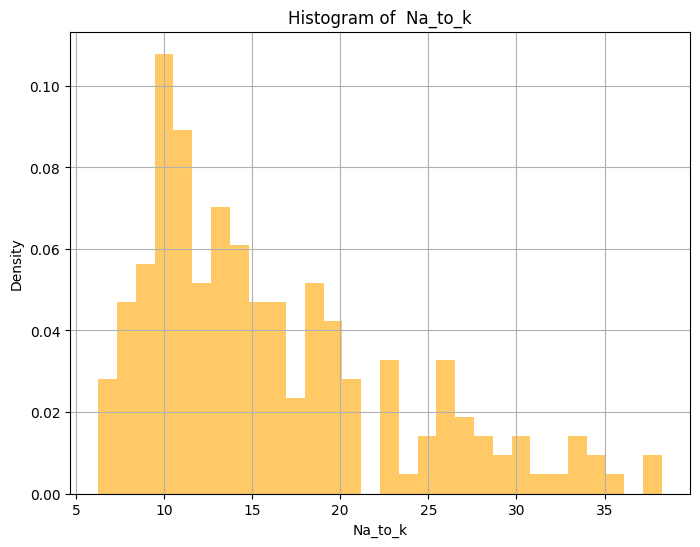

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['Na_to_K'], bins=30, density=True, alpha=0.6, color='orange')
plt.title('Histogram of  Na_to_k')
plt.xlabel('Na_to_k')
plt.ylabel('Density')
plt.grid(True)
plt.show()

the plot clearly shows that the distribution of Na_to_k is right skewed amd platykurtic in nature

In [10]:
# Calculate mean, standard deviation, skewness, and kurtosis for Na_to_K
mean_math = np.mean(df['Na_to_K'])
std_dev_math = np.std(df['Na_to_K'])
skewness_math = np.mean((df['Na_to_K'] - mean_math) ** 3) / (std_dev_math ** 3)
kurtosis_math = np.mean((df['Na_to_K'] - mean_math) ** 4) / (std_dev_math ** 4) - 3

# Calculate mean, standard deviation, skewness, and kurtosis for Age
mean_reading = np.mean(df['Age'])
std_dev_reading = np.std(df['Age'])
skewness_reading = np.mean((df['Age'] - mean_reading) ** 3) / (std_dev_reading ** 3)
kurtosis_reading = np.mean((df['Age'] - mean_reading) ** 4) / (std_dev_reading ** 4) - 3



# Print descriptive statistics for each subject
print("Descriptive Statistics:")
print("\nNa_to_K:")
print(f"Mean: {mean_math:.2f}")
print(f"Standard Deviation: {std_dev_math:.2f}")
print(f"Skewness: {skewness_math:.2f}")
print(f"Kurtosis: {kurtosis_math:.2f}")

print("\nAge:")
print(f"Mean: {mean_reading:.2f}")
print(f"Standard Deviation: {std_dev_reading:.2f}")
print(f"Skewness: {skewness_reading:.2f}")
print(f"Kurtosis: {kurtosis_reading:.2f}")




Descriptive Statistics:

Na_to_K:
Mean: 16.08
Standard Deviation: 7.21
Skewness: 1.03
Kurtosis: 0.34

Age:
Mean: 44.31
Standard Deviation: 16.50
Skewness: 0.03
Kurtosis: -1.09



For Na_to_K:
- Mean: 16.08
- Standard Deviation: 7.21
- Skewness: 1.03
- Kurtosis: 0.34

The skewness value of 1.03 indicates that the distribution of the Na_to_K variable is moderately skewed to the right. This means that there might be a tail towards higher values. The positive skewness suggests that there are more observations with lower values and a few with higher values than the mean.

The kurtosis value of 0.34 indicates that the distribution is relatively platykurtic. This means that the tails of the distribution are lighter than the tails of a normal distribution. There are fewer extreme values (outliers) than in a normal distribution.

For Age:
- Mean: 44.31
- Standard Deviation: 16.50
- Skewness: 0.03
- Kurtosis: -1.09

The skewness value of 0.03 indicates almost no skewness in the distribution of the Age variable. This suggests that the distribution is close to symmetrical.

The kurtosis value of -1.09 indicates that the distribution is platykurtic. This means that the distribution has lighter tails and fewer outliers compared to a normal distribution.

In summary, the Na_to_K variable has a moderately skewed distribution to the right, indicating more observations with lower values. It also has a relatively platykurtic distribution, suggesting fewer extreme values. On the other hand, the Age variable has a nearly symmetrical distribution with very little skewness and a platykurtic distribution, indicating lighter tails and fewer outliers.

<ipython-input-11-bdc5958cd1e7>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], color='green', shade=True)


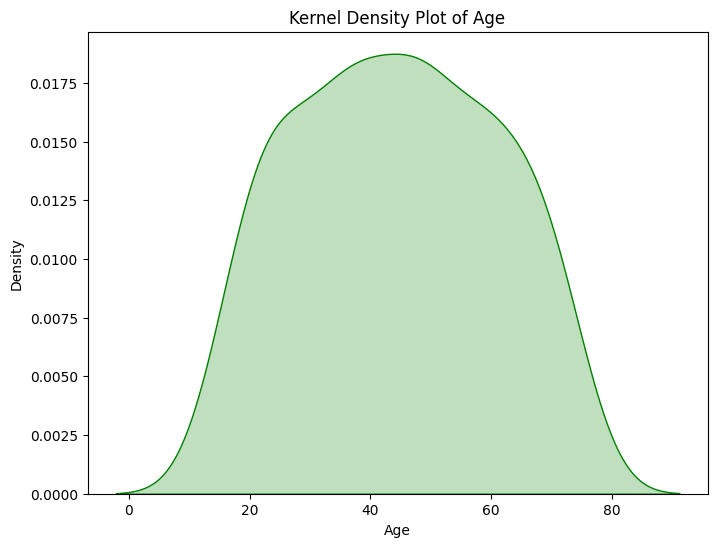

In [11]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], color='green', shade=True)
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Age')
plt.show()

the graph depicts that the distribution of the age in the dataset is symmetric but slightly skewed , and platykurtic in nature

Text(0.5, 1.0, 'QQ Plot of Age')

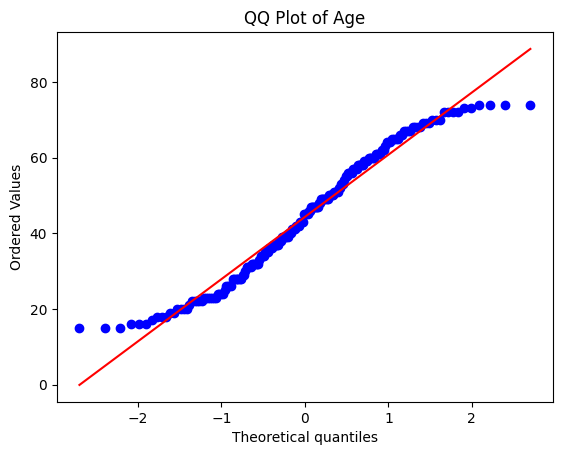

In [12]:
from scipy import stats
stats.probplot(df['Age'], dist="norm", plot=plt)
plt.title('QQ Plot of Age')

The distribution of Age may not follow the normal distribution  since since the points do not follow the straight line perfectly  

Text(0.5, 1.0, 'QQ Plot of Na_to_K')

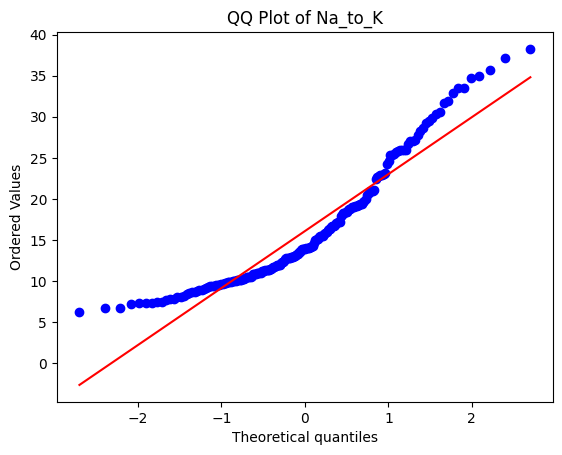

In [13]:
from scipy import stats
stats.probplot(df['Na_to_K'], dist="norm", plot=plt)
plt.title('QQ Plot of Na_to_K')

The distribution of Na_to_K may not follow the normal distribution  since since the points do not follow the straight line perfectly  

### **Univariate Analysis**

Categorical Variables:

In [14]:
BP_freq = df['BP'].value_counts(normalize=True)
print(BP_freq)

BP
HIGH      0.385
LOW       0.320
NORMAL    0.295
Name: proportion, dtype: float64


In [15]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

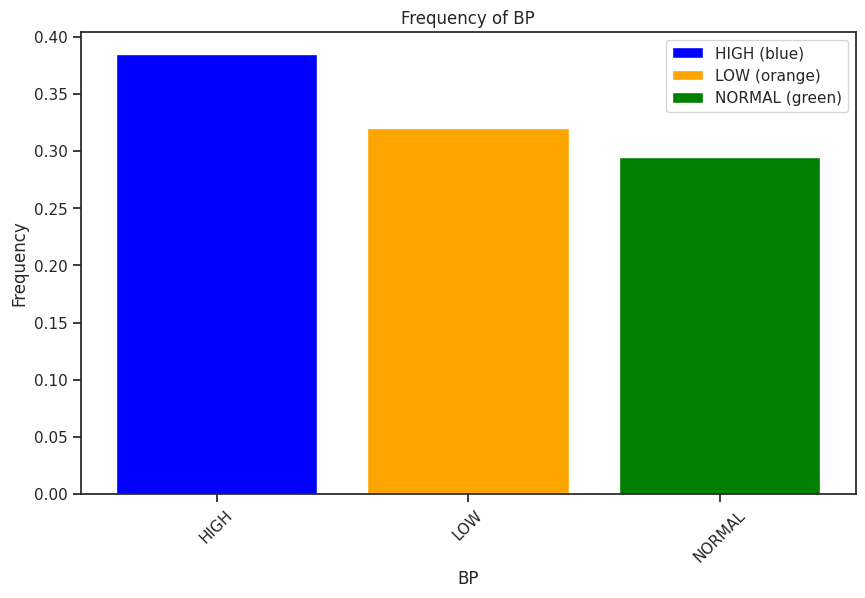

In [68]:
# Define colors for each category of parental level of education
colors = {
    "HIGH": "blue",
    "LOW": "orange",
    "NORMAL": "green",
}

# Create the bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(BP_freq.index,BP_freq.values, color=[colors[ple] for ple in BP_freq.index])

# Add labels and title
plt.xlabel('BP')
plt.ylabel('Frequency')
plt.title('Frequency of BP')
plt.xticks(rotation=45)

# Add legend
legend_labels = list(map(lambda x: f"{x} ({colors[x]})",BP_freq.index))
plt.legend(bars, legend_labels)

plt.show()


The  graph shows the distribution of different BP values in the dataset and we clearly see the occurrence of patients with HIGH BP is more and second is LOw  followed by normal.

In [17]:
drug_freq = df['Drug'].value_counts(normalize=True)
print(drug_freq)

Drug
DrugY    0.455
drugX    0.270
drugA    0.115
drugC    0.080
drugB    0.080
Name: proportion, dtype: float64


In [18]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

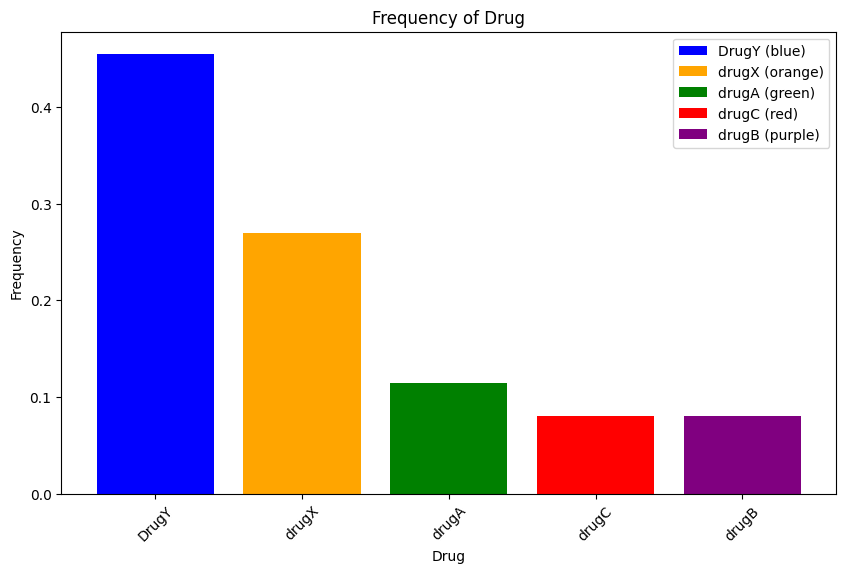

In [19]:
# Define colors for each category of race/ethnicity
colors_race = {
    'DrugY': 'blue',
    'drugX': 'orange',
    'drugA': 'green',
    'drugC': 'red',
    'drugB': 'purple'
}

# Race/ethnicity frequencies
race_freq = {
    'DrugY' :  0.455,
 'drugX' :  0.270,
'drugA' :   0.115,
'drugC' :   0.080,
'drugB' :  0.080
}

# Create the bar plot for race/ethnicity
plt.figure(figsize=(10, 6))
bars_race = plt.bar(race_freq.keys(), race_freq.values(), color=[colors_race[race] for race in race_freq.keys()])

# Add labels and title for race/ethnicity plot
plt.xlabel('Drug')
plt.ylabel('Frequency')
plt.title('Frequency of Drug')
plt.xticks(rotation=45)

# Add legend for race/ethnicity plot
legend_labels_race = list(map(lambda x: f"{x} ({colors_race[x]})", race_freq.keys()))
plt.legend(bars_race, legend_labels_race)

plt.show()


The graph shows the distribution of different  types of drugs in the dataset , and we see the occurence of Drug Y is  more in the dataset  followed by drugx and the least  occurrence is drugc

In [20]:
Sex_freq = df['Sex'].value_counts(normalize=True)
print(Sex_freq)

Sex
M    0.52
F    0.48
Name: proportion, dtype: float64


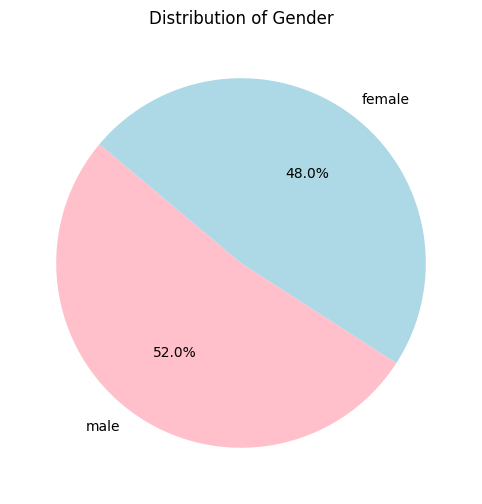

In [21]:


# Gender distribution
gender_distribution = {
    'male': 0.52,
    'female': 0.48
}

# Define colors for each gender
colors_gender = ['pink', 'lightblue']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_distribution.values(), labels=gender_distribution.keys(), autopct='%1.1f%%', colors=colors_gender, startangle=140)
plt.title('Distribution of Gender')
plt.show()

In [22]:
choles_freq = df['Cholesterol'].value_counts(normalize=True)
print(choles_freq)

Cholesterol
HIGH      0.515
NORMAL    0.485
Name: proportion, dtype: float64


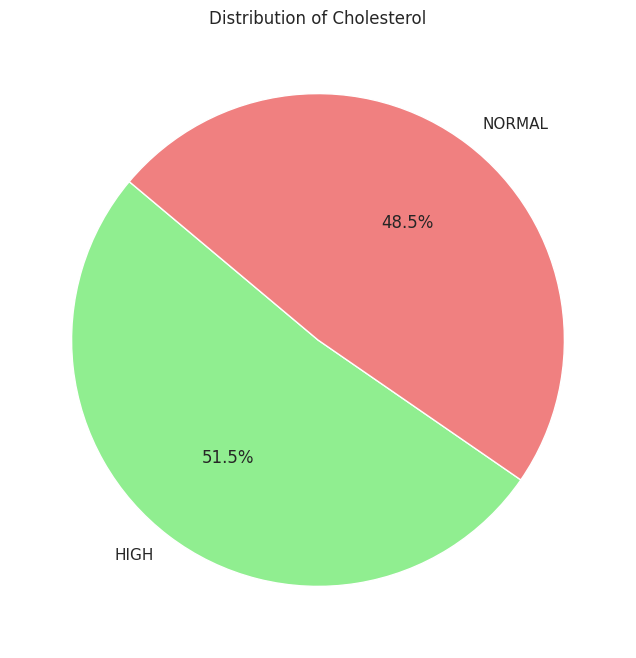

In [69]:
test_prep_distribution = {
   'HIGH'     : 0.515,
'NORMAL'   : 0.485,
}

# Define colors for each category
colors_test_prep = ['lightgreen', 'lightcoral']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(test_prep_distribution.values(), labels=test_prep_distribution.keys(), autopct='%1.1f%%', colors=colors_test_prep, startangle=140)
plt.title('Distribution of Cholesterol')
plt.show()

### **Bivariate Analysis:**

* Explore relationships between pairs of numerical variables:

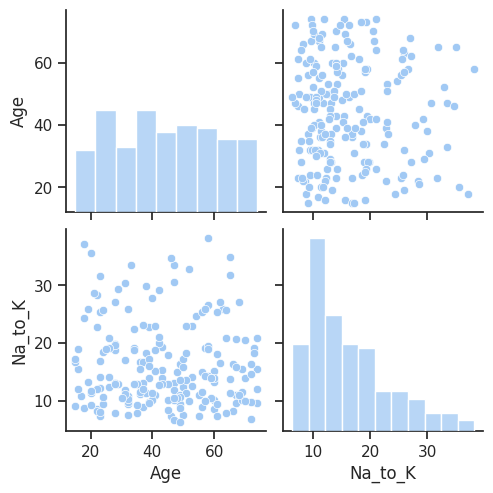

In [24]:
sns.set(style="ticks", palette="pastel")
sns.pairplot(df)
plt.show()

Clearly we see that there is no linear relationship between age and Na_to_k

In [25]:
scores_subset = df[['Age', 'Na_to_K']]

# Calculate the correlation matrix
correlation_matrix = scores_subset.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Age   Na_to_K
Age      1.000000 -0.063119
Na_to_K -0.063119  1.000000



- The correlation coefficient between Age and Na_to_K is approximately -0.0631.
- This value indicates a very weak negative correlation between Age and Na_to_K.

Inference:
- Since the correlation coefficient is close to zero and negative, it suggests that there is almost no linear relationship between Age and Na_to_K.
- This means that changes in Age are not associated with consistent changes in Na_to_K, and vice versa.
- The correlation being close to zero indicates that Age and Na_to_K vary independently of each other.
- Therefore, based on this correlation, we can infer that Age and Na_to_K are not significantly related in the dataset.

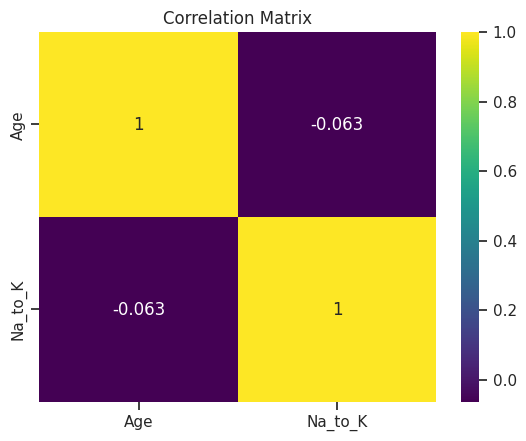

In [26]:
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

In [27]:
import pandas as pd

def preprocess_dataset(df):
    """
    Preprocess the dataset by replacing categorical values with numerical values.

    Parameters:
    df (pandas.DataFrame): Input DataFrame containing columns to be preprocessed.

    Returns:
    pandas.DataFrame: Preprocessed DataFrame with categorical values replaced by numerical values.
    """
    # Copy the DataFrame to avoid modifying the original DataFrame
    df_processed = df.copy()

    # Replace 'F' with 1 and 'M' with 0 in the 'Sex' column
    df_processed['Sex'] = df_processed['Sex'].replace({'F': 1, 'M': 0})

    # Replace 'HIGH' with 1, 'NORMAL' with 0, and 'LOW' with -1 in the 'BP' column
    df_processed['BP'] = df_processed['BP'].replace({'HIGH': 1, 'NORMAL': 0, 'LOW': -1})

    # Replace 'HIGH' with 1 and 'NORMAL' with 0 in the 'Cholesterol' column
    df_processed['Cholesterol'] = df_processed['Cholesterol'].replace({'HIGH': 1, 'NORMAL': 0})

    # Replace drug names with numerical values in the 'Drug' column
    drug_mapping = {'drugA': 1, 'drugB': 2, 'drugC': 3, 'drugX': 4, 'DrugY': 5}
    df_processed['Drug'] = df_processed['Drug'].replace(drug_mapping)

    return df_processed

# Example usage:
# Assuming 'df' is your DataFrame
# Replace 'df' with the name of your DataFrame
df_preprocessed = preprocess_dataset(df)


In [28]:
df_preprocessed

Age  Sex  BP  Cholesterol  Na_to_K  Drug
0     23    1   1            1   25.355     5
1     47    0  -1            1   13.093     3
2     47    0  -1            1   10.114     3
3     28    1   0            1    7.798     4
4     61    1  -1            1   18.043     5
..   ...  ...  ..          ...      ...   ...
195   56    1  -1            1   11.567     3
196   16    0  -1            1   12.006     3
197   52    0   0            1    9.894     4
198   23    0   0            0   14.020     4
199   40    1  -1            0   11.349     4

[200 rows x 6 columns]

# **Separate features and target variable:**

In [50]:
X = df_preprocessed[['BP', 'Cholesterol', 'Na_to_K']]
y = df_preprocessed['Drug']

In [51]:
# Assuming numerical variables need standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# **Split the dataset into training and testing sets:**

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# **Implementing SVM Model**

In [53]:
# Iterate over different kernel functions and evaluate performance
kernel_functions = ['linear', 'poly', 'rbf','sigmoid']  # Example kernel functions
for kernel in kernel_functions:
    svm_model = SVC(kernel=kernel)
    svm_model.fit(X_train, y_train)
    y_pred = svm_model.predict(X_test)
    print(f"Kernel: {kernel}")
    print(classification_report(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))


Kernel: linear
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         3
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        15

    accuracy                           0.93        40
   macro avg       0.73      0.80      0.76        40
weighted avg       0.88      0.93      0.89        40

[[ 6  0  0  0  0]
 [ 3  0  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Kernel: poly
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       0.00      0.00      0.00         3
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00        11
           5       0.94      1.00      0.97        15

    accuracy                           0.90        40
   macro avg

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

The classification report provides several metrics to evaluate the performance of each kernel function:

1. **Precision**: Indicates the proportion of true positive predictions among all positive predictions made by the model. A higher precision indicates fewer false positives.
2. **Recall**: Also known as sensitivity, it measures the proportion of actual positives that were correctly identified by the model. A higher recall indicates fewer false negatives.
3. **F1-score**: The harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates better overall performance.
4. **Support**: The number of occurrences of each class in the dataset.

Now, let's interpret the results for each kernel:

**Linear Kernel**:
- High precision, recall, and F1-score for classes 1, 3, 4, and 5, indicating excellent performance in predicting these classes.
- Low precision, recall, and F1-score for class 2, suggesting that the model struggles to predict this class accurately.

**Polynomial Kernel**:
- Similar performance to the linear kernel for classes 1, 4, and 5.
- Slightly lower precision, recall, and F1-score for class 3 compared to the linear kernel.
- Poor performance for class 2, with all metrics being zero, indicating that the model fails to predict this class.

**RBF Kernel**:
- Similar performance to the linear kernel for all classes, with high precision, recall, and F1-score.
- It effectively predicts all classes with high accuracy.

**Sigmoid Kernel**:
- Similar to the polynomial kernel, with relatively lower performance compared to linear and RBF kernels.
- It has lower precision, recall, and F1-score for class 3.
- Poor performance for class 2, with all metrics being zero.

Overall, the RBF kernel appears to perform the best, followed by the linear kernel, while the polynomial and sigmoid kernels show relatively lower performance, particularly for certain classes.

In [64]:
h = 1  # step size in the mesh
# Create the mesh grid
z_min, z_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
zz = np.linspace(z_min, z_max, ww.shape[0])
w_min, w_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
v_min, v_max = X_scaled[:, 2].min() - 1, X_scaled[:, 2].max() + 1
zz, ww, vv = np.meshgrid(np.arange(z_min, z_max, h),
                                  np.arange(w_min, w_max, h),
                                  np.arange(v_min, v_max, h))

titles = ['Linear kernel','RBF kernel','Polynomial kernel','Sigmoid kernel']

In [63]:
print("Shape of zz:", zz.shape)
print("Shape of ww:", ww.shape)
print("Shape of vv:", vv.shape)

Shape of zz: (41, 44, 65)
Shape of ww: (5, 5, 7)
Shape of vv: (5, 5, 7)


In [65]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

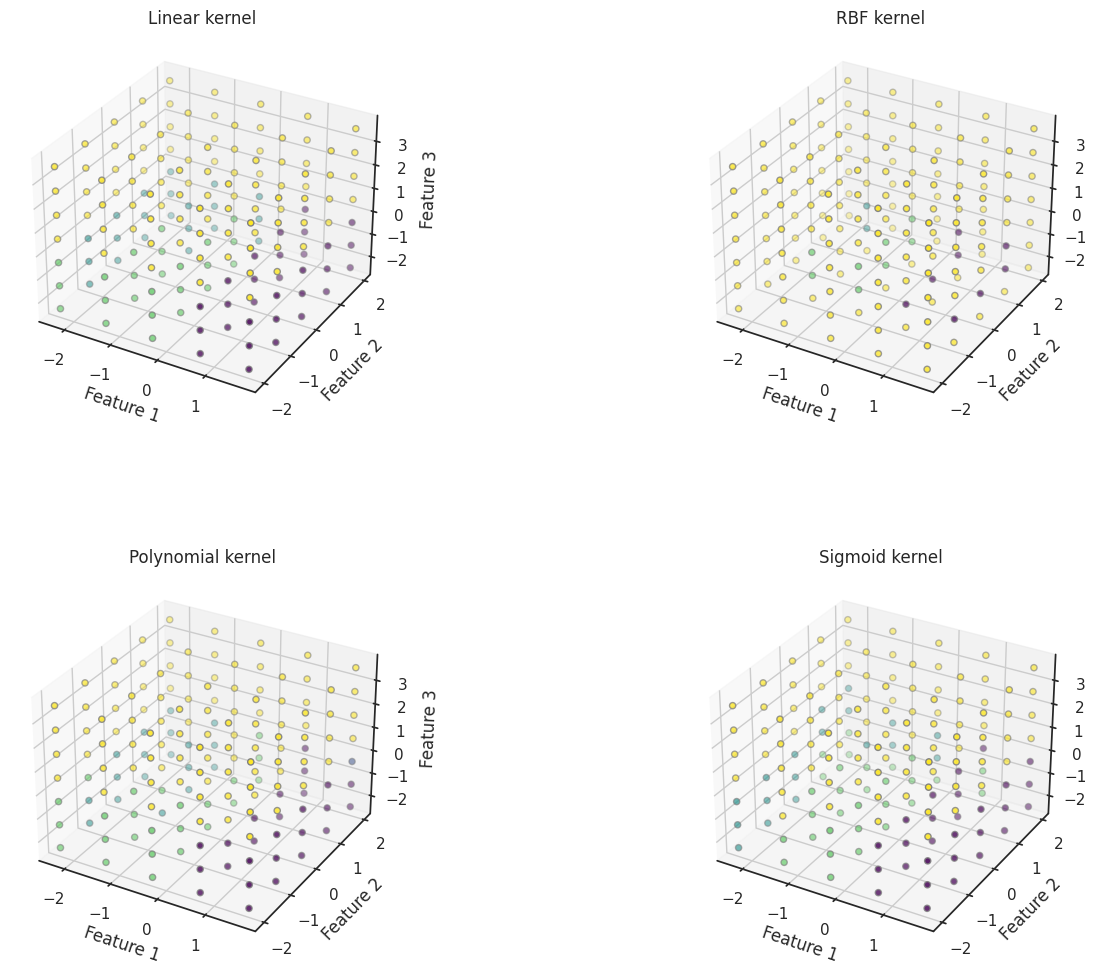

In [66]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D plots
fig = plt.figure(figsize=(15, 12))

# Plot each SVM kernel method in a separate subplot
for i, (clf, title) in enumerate(zip((linear, rbf, poly, sig), titles), 1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    # Predict for mesh grid points
    Z = clf.predict(np.c_[zz.ravel(), ww.ravel(), vv.ravel()])
    Z = Z.reshape(zz.shape)

    # Plot the points in the mesh grid along with their predicted class labels
    ax.scatter(zz.ravel(), ww.ravel(), vv.ravel(), c=Z.ravel(), cmap='viridis', edgecolors='grey')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    ax.set_title(title)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Show the plot
plt.show()


# **Conclusion**:
In summary, the evaluation of different SVM kernel functions reveals varying levels of performance across classes. The linear kernel demonstrates strong predictive capabilities for most classes, except for class 2, where it struggles. The polynomial kernel shows similar performance but fails to predict class 2 accurately. The RBF kernel performs consistently well across all classes, indicating robust predictive power. On the other hand, the sigmoid kernel exhibits relatively lower performance, particularly for class 3, and fails to predict class 2 effectively. Overall, the RBF kernel stands out as the top performer, followed by the linear kernel, while the polynomial and sigmoid kernels exhibit weaker performance, especially in certain classes.